In [1]:
#standard libraries
import pandas as pd, numpy as np

#visualization libraries
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

#### **Data**

In [2]:
#import the data set
users = pd.read_csv('original/user_details.csv')

#read the data set
users.head(3)

,Пользователь,Местоположение,Монеты,Подписчики,Пароль,Новости
0,test@test.ru,Мурманск,109,True,12345,False
1,zdotat@yandex.ru,Москва,67,True,12345,False
2,ivan.ptr@gmail.com,Без города,115,False,123,False


In [3]:
#find the dimensions
users.shape

(654, 6)

In [4]:
#basic information
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Пользователь    654 non-null    object
 1   Местоположение  654 non-null    object
 2   Монеты          654 non-null    int64 
 3   Подписчики      654 non-null    bool  
 4   Пароль          654 non-null    object
 5   Новости         654 non-null    bool  
dtypes: bool(2), int64(1), object(3)
memory usage: 21.8+ KB


##### rename the features

In [5]:
#rename the columns
users = users.rename(columns={'Пользователь': 'User',
                              'Местоположение': 'Location',
                              'Монеты': 'Coins',
                              'Подписчики': 'Subscribers',
                              'Пароль': 'Password',
                              'Новости': 'News'
                              })

##### check for null values

In [6]:
#check for null values
users.isnull().sum()[users.isnull().sum() > 0]

Series([], dtype: int64)

##### check for duplicates

In [7]:
#check for duplicate values
dupl_columns = list(users.columns)

mask = users.duplicated(subset=dupl_columns)
users_duplicates = users[mask]
print(f'Number of Duplicates: {users_duplicates.shape[0]}')

Number of Duplicates: 0


In [8]:
#remove duplicates
# users = users.drop_duplicates(subset=dupl_columns)
# print(f'New Dimensions: {users.shape[0]}')

In [9]:
#find how unique each feature is
print(f"Number of Unique Users: {users['User'].nunique()}")
print(f"Number of Unique Locations: {users['Location'].nunique()}")
print(f"Number of Unique Coins: {users['Coins'].nunique()}")

Number of Unique Users: 654
Number of Unique Locations: 86
Number of Unique Coins: 58


In [10]:
print(f"Unique Locations: {users['Location'].unique()}")

Unique Locations: ['Мурманск' 'Москва' 'Без города' 'Орск' 'Иркутск' 'Тверь' 'Череповец'
 'Сочи' 'Пятигорск' 'Барнаул' 'Кемерово' 'Пушкино' 'Владивосток'
 'Подольск' 'Владимир' 'Санкт-Петербург' 'Нижневартовск' 'Пермь' 'Казань'
 'Орёл' 'Самара' 'Магадан' 'Петрозаводск' 'Екатеринбург' 'Новосибирск'
 'Первоуральск' 'Октябрьский' 'Нижний Новгород' 'Волжский' 'Нальчик'
 'Якутск' 'Уфа' 'Красноярск' 'Братск' 'Омск' 'Тюмень' 'Ставрополь'
 'Дзержинск' 'Южно-Сахалинск' 'Краснодар' 'Воронеж' 'Прокопьевск'
 'Чебоксары' 'Сыктывкар' 'Челябинск' 'Липецк' 'Набережные Челны'
 'Владикавказ' 'Абакан' 'Калининград' 'Киров' 'Находка' 'Архангельск'
 'Хабаровск' 'Рязань' 'Тольятти' 'Чита' 'Волгоград' 'Таганрог' 'Курск'
 'Благовещенск' 'Горно-Алтайск' 'Петропавловск-Камчатский' 'Ярославль'
 'Астрахань' 'Томск' 'Люберцы' 'Ростов-на-Дону' 'Миасс' 'Ижевск' 'Саранск'
 'Новороссийск' 'Иваново' 'Армавир' 'Электросталь' 'Оренбург' 'Раменское'
 'Анапа' 'Уссурийск' 'Тамбов' 'Снежинск' 'Бийск' 'Майкоп' 'Махачкала'
 'Б

In [11]:
print(f"Unique Coins: {users['Coins'].unique()}")

Unique Coins: [109  67 115  73   9 112   0 130  10  19  63  96 118 103  36  45  27 123
  18  16 129  12 124  54 127  15  79  94  86  60  99  78 128  33  66  51
   6 131  28 121  48 132  72  24 120 106  81 125  82  80 111 119 113 133
  77  42  69  39]


In [12]:
#create binary features
users['Subscribers_n'] = users['Subscribers'].apply(lambda x: 1 if x == True else 0)
users['News_n'] = users['News'].apply(lambda x: 1 if x == True else 0)

In [13]:
#convert the data types
users['User'] = users['User'].astype('string')
users['Location'] = users['Location'].astype('string')
users['Coins'] = users['Coins'].to_numpy('int16')
users['Password'] = users['Password'].astype('string')
users['Subscribers_n'] = users['Subscribers_n'].to_numpy('int8')
users['News_n'] = users['News_n'].to_numpy('int8')

#### **Visualization**

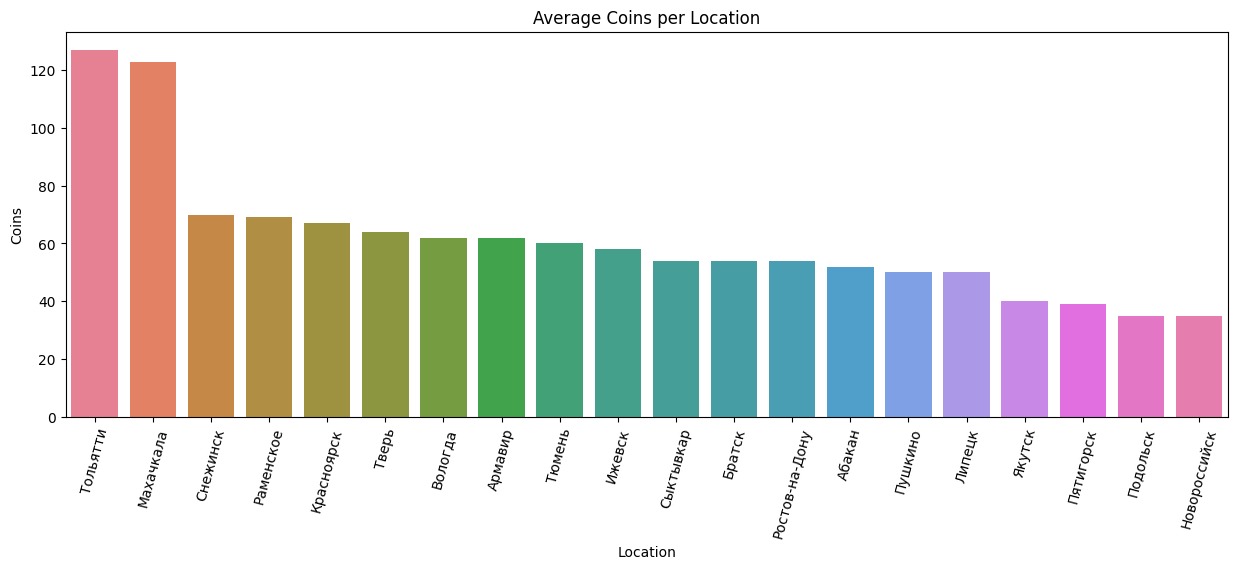

In [14]:
#top 20 cities for (average) coins
aver_coins_per_location = users.groupby('Location')['Coins'].mean().round().sort_values(ascending=False).nlargest(20)
aver_coins_per_location = pd.DataFrame(aver_coins_per_location)

#set the canvas
plt.figure(figsize=(15, 5))

ax = sns.barplot(aver_coins_per_location,
                 x='Location',
                 y='Coins',
                 hue='Location').set(title='Average Coins per Location')

plt.xticks(rotation=75);

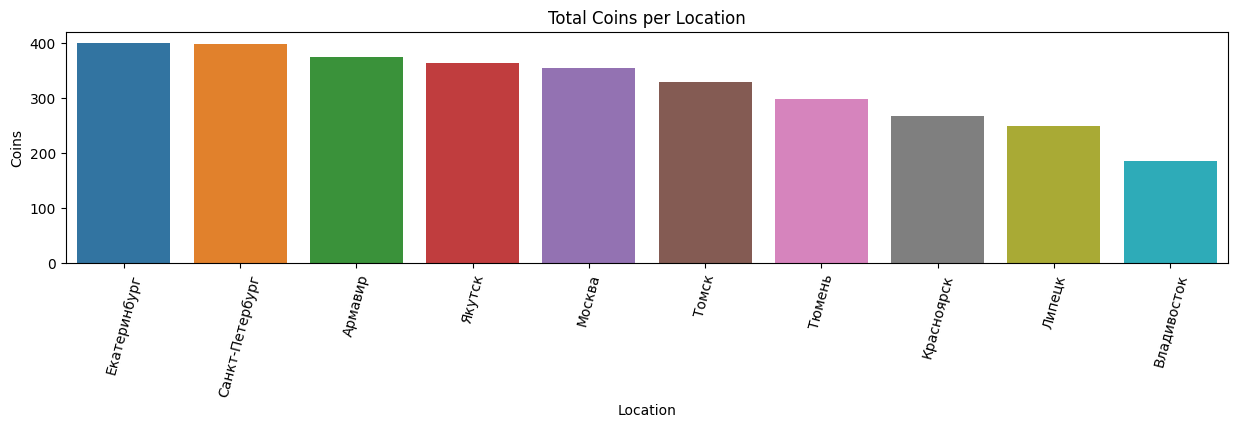

In [15]:
#top 10 cities for coins
coins_per_location = users.groupby('Location')['Coins'].sum().round().sort_values(ascending=False).nlargest(11)
coins_per_location = pd.DataFrame(coins_per_location[1:])
coins_per_location

#set the canvas
plt.figure(figsize=(15, 3))

ax = sns.barplot(coins_per_location,
                 x='Location',
                 y='Coins',
                 hue='Location').set(title='Total Coins per Location')

plt.xticks(rotation=75);

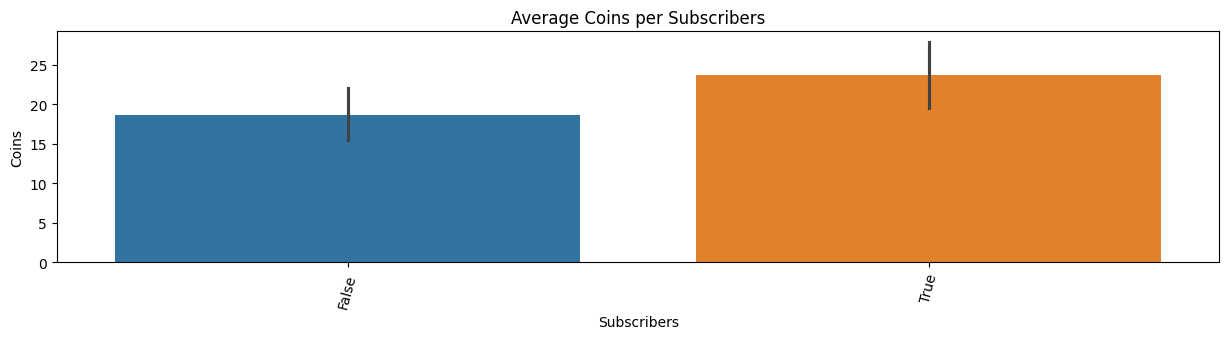

In [16]:
#set the canvas
plt.figure(figsize=(15, 3))

ax = sns.barplot(users,
                 x='Subscribers',
                 y='Coins',
                 hue='Subscribers',
                 estimator='mean',
                 legend=False,).set(title='Average Coins per Subscribers')

plt.xticks(rotation=75);

#### **Export**

In [17]:
#create a file name
xlx_name = 'users.xlsx'

#save to excel
users.to_excel('./adjusted/' + xlx_name,
               sheet_name='user_details')